# Keras Gradient Descent


In [1]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


C:\Users\Barbu\AppData\Local\Temp\ipykernel_12936\2819415339.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('./inputKaggle/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)  # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [50]


c:\Users\Barbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10, :]).head()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])


In [5]:
#Add loss and optimizer

model.compile(
    optimizer='adam',
    loss='mae'
)


In [6]:
# Train model
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)


Epoch 1/200
9/9 [==============================] - 0s 2ms/step - loss: 3.0614
Epoch 2/200
9/9 [==============================] - 0s 1000us/step - loss: 1.3238
Epoch 3/200
9/9 [==============================] - 0s 1ms/step - loss: 0.7232
Epoch 4/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3500
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.2812
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 0.2052
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1566
Epoch 8/200
9/9 [==============================] - 0s 1000us/step - loss: 0.1304
Epoch 9/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1116
Epoch 10/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0959
Epoch 11/200
9/9 [==============================] - 0s 1000us/step - loss: 0.0871
Epoch 12/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0834
Epoch 13/200
9/9 [==============================] - 

<Axes: >

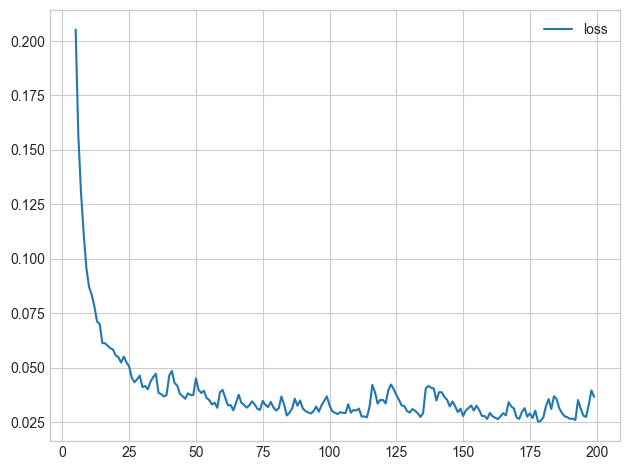

In [7]:
#Evaluate training
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot()


In [8]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
learning_rate = 0.05
batch_size = 32
num_examples = 256

#animate_sgd(
#    learning_rate=learning_rate,
#    batch_size=batch_size,
#    num_examples=num_examples,
#    # You can also change these, if you like
#    steps=50,  # total training steps (batches seen)
#    true_w=3.0,  # the slope of the data
#    true_b=2.0,  # the bias of the data
#)
